In order to successfully complete this assignment we recommend that you participate both individually and in groups during class. **Turn in your assignment using Deepnote no later than 11:59pm on the day of class.** Grading is based on attendance, correctness, and completion.

## Put the names of all group members present today below:

Jacob Miller, Kaitlyn Watson，Haobo.Liu, David Robbins

# 11 In-Class Assignment: 

    

### Objectives 

1. Be able to determine properties of eigenvalues and eigenvectors based on the action of the matrix (e.g. rotations, reflections, scaling)
1. Be able to compute eigenvalues and eigenvectors (complex or real)
1. Understand the relationship between complex eigenvalues and rotation.
1. Markov Models
 - Create a matrix that represents a Markov Model
 - Use eigenvalues/eigenvectors of this matrix to find and interpret the steady-state solution of the system. 


---
<a name="Page-Rank"></a>
## 1. Page Rank

Google's famous "Page Rank" algorithm is just a calculation of the likelyhood that a person will reach a particular web page.  

> To explain the algorithm, we model the web as an oriented graph. The vertices are the pages, and the oriented edges are the links between pages. As we just explained, each page corresponds to a different url. Hence, a website may contain many pages. The model makes no difference between the individual pages of a website and its front page. But, most likely, the algorithm will rank better the front page of an important website.

From: http://blog.kleinproject.org/?p=280

Using the vocabulary from this course, a simplified version of Page Rank is the steady state probabilities of the Markov State Model where each node in the network is a page and each transition probability is calculated as an equal probablility from the current page to its linked pages.  

For this problem, consider the following Markov model of a generic webpage. 

https://lh4.googleusercontent.com/LFe_yWxZA_F_Ze3PSMqwQds9zUOgjnzGP6pxPZJYAGjRTj_BKNqvcDxGHhbZg1Y3iSVOFPb9MW_a8JvwrdhfU3Av7zC13JO_faPs0WC7AziKWMwrwKkqdl6RJmxq=w477

&#9989; <font color=red>**Do this.**</font> Find the state transition matrix for the above system. Call this matrix $A$. Let's consider <br/> Home = state 1, About = state 2, Resume = state 3, Blog = state 4 and let $p_{ij}$ be the probability transition from state $j$ to state $i$. 

In [ ]:
%matplotlib inline 
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

A = np.matrix([[0.25, 0.5, 0.2, 0.1], [0.2, 0.5, 0, 0], [0.25, 0, 0.8, 0], [0.3, 0, 0, 0.9]])
sym.Matrix(A)

⎡0.25  0.5  0.2  0.1⎤
⎢                   ⎥
⎢0.2   0.5   0    0 ⎥
⎢                   ⎥
⎢0.25   0   0.8   0 ⎥
⎢                   ⎥
⎣0.3    0    0   0.9⎦

&#9989; <font color=red>**Do this:**</font> Using ```numpy``` calculate the eigenvalues and eigenvectors of the model.

In [ ]:
E_Vals, E_Vecs = np.linalg.eig(A)

steady_state = [E_Vecs[:,2][0], E_Vecs[:,2][1], E_Vecs[:,2][2], E_Vecs[:,2][3]]
print(steady_state)

[matrix([[0.29207197]]), matrix([[0.11682879]]), matrix([[0.36508996]]), matrix([[0.87621591]])]


&#9989; <font color=red>**Do this:**</font>  The vector associated with the eigenvalue of 1 is the steady state vector $S$. Create a new vector $\hat{S}$ (`S_hat` in python) that is equivlent to the steady state vector scaled by a constant $c$ (i.e. $cS = \hat{S}$) such that the components of this new vector sum up to one (i.e. $\sum_{i=0}^{n}\hat{S}_i = 1$). 

In [ ]:
#Put your answer here
const = 0.605985
S_hat = []
for i in range(len(steady_state)):
    S_hat.append(float(steady_state[i]) * const)
su = 0.0
print(S_hat)
for i in range(len(S_hat)):
    su += S_hat[i]
print(su)

[0.17699123247313975, 0.07079649298925611, 0.22123904059142446, 0.5309736974194177]
1.000000463473238


&#9989; <font color=red>**Do this:**</font> Based on the long term steady state vector that you calculated, which page are people likely to spend the most time? Explain how you came up with the answer.

Based on the steady state vector we created, we found that the Blog page would be where people likely spend the most time. We found this by looking at the largest eigen vector value in S-hat. This makes sence when looking at our Markhov Matrix above.

&#9989; <font color=red>**Do this:**</font>  Construct a new matrix $P$ of the same size as $A$ with a copy of the normalized steady state vector ($\hat{S}$) in each column. 

In [ ]:
# Put the answer to the above question here

P = np.matrix([[S_hat[0], S_hat[1], S_hat[2], S_hat[3]],[S_hat[0], S_hat[1], S_hat[2], S_hat[3]],[S_hat[0], S_hat[1], S_hat[2], S_hat[3]], [S_hat[0], S_hat[1], S_hat[2], S_hat[3]]]).T
sym.Matrix(P)

⎡ 0.17699123247314    0.17699123247314    0.17699123247314    0.17699123247314
⎢                                                                             
⎢0.0707964929892561  0.0707964929892561  0.0707964929892561  0.070796492989256
⎢                                                                             
⎢0.221239040591424   0.221239040591424   0.221239040591424   0.221239040591424
⎢                                                                             
⎣0.530973697419418   0.530973697419418   0.530973697419418   0.530973697419418

 ⎤
 ⎥
1⎥
 ⎥
 ⎥
 ⎥
 ⎦

&#9989; <font color=red>**Do this:**</font> If exactly 10,000 people are on the website at a time (assume this is constant), estimate how many people will be on the About page over the long term?  Explain how you came up with your answer.

**<font color=red>Put your explanation and thought process here.</font>**

it would be 712 people over the long term. We simply took the steady state vector and multiplied it by 10,0000

In [ ]:
# Put the answer to the above question here
Solution=P*10000
Solution

matrix([[1769.91232473, 1769.91232473, 1769.91232473, 1769.91232473],
        [ 707.96492989,  707.96492989,  707.96492989,  707.96492989],
        [2212.39040591, 2212.39040591, 2212.39040591, 2212.39040591],
        [5309.73697419, 5309.73697419, 5309.73697419, 5309.73697419]])

&#9989; <font color=red>**Do this:**</font> Modify the following code from in-class-10 to create a graph of the long term behavior. Assume 100 people start on the home page.

[[17.6992709 ]
 [ 7.07970836]
 [22.12408863]
 [53.09781271]]
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


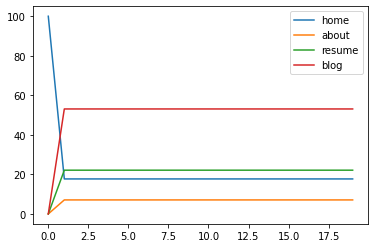

In [ ]:
home = [100]
about = [0]
resume = [0]
blog = [0]

current_state = np.matrix([[home[0]], [about[0]], [resume[0]], [blog[0]]])

for i in range(19):
    #update Current State
    current_state = P*current_state
    
    #Store history for each room
    home.append(current_state[0])
    about.append(current_state[1])
    resume.append(current_state[2])
    blog.append(current_state[3])
    
plt.plot(home, label="home");
plt.plot(about, label="about");
plt.plot(resume, label="resume");
plt.plot(blog, label="blog");
plt.legend();
print(current_state)

## 2. Diagonalization

**_Reminder_**: The eigenvalues of diagonal and triangular (upper and lower) matrices are easy:

* The eigenvalues for the diagonal matrices are the diagonal elements.
* The eigenvalues for triangular matrices are the diagonal elements.

The above is NOT true for general matrices!

### Diagonalization


**Definition**: A square matrix $A$ is said to be *diagonalizable* if there exist a matrix $C$ such that $D=C^{-1}AC$ is a diagonal matrix.

**Definition**: $B$ is a *similar matrix* of $A$ if we can find $C$ such that $B=C^{-1}AC$.


Given an $n\times n$ matrix $A$, can we find another $n \times n$ invertable matrix $C$ such that $D=C^{-1}AC$ is diagonal, i.e., $A$ is diagonalizable?

* Because $C$ is inveritable, we have 
$$C^{-1}AC=D \\ CC^{-1}AC = CD\\ AC = CD $$


* Generate $C$ as the columns of $n$ linearly independent vectors $(x_1...x_n)$. We can compute $AC=CD$ as follows:
$$ A\begin{bmatrix} \vdots  & \vdots  & \vdots  & \vdots  \\ \vdots  & \vdots  & \vdots  & \vdots  \\ { x }_{ 1 } & { x }_{ 2 } & \dots  & { x }_{ n } \\ \vdots  & \vdots  & \vdots  & \vdots  \end{bmatrix}=AC=CD=\begin{bmatrix} \vdots  & \vdots  & \vdots  & \vdots  \\ \vdots  & \vdots  & \vdots  & \vdots  \\ { x }_{ 1 } & { x }_{ 2 } & \dots  & { x }_{ n } \\ \vdots  & \vdots  & \vdots  & \vdots  \end{bmatrix}\begin{bmatrix} { \lambda  }_{ 1 } & 0 & 0 & 0 \\ 0 & { \lambda  }_{ 2 } & 0 & 0 \\ \vdots  & \vdots  & { \dots  } & \vdots  \\ 0 & 0 & 0 & { \lambda  }_{ n } \end{bmatrix}$$
* Then we check the corresponding columns of the both sides. We have 
$$Ax_1 = \lambda_1x_1\\\vdots\\Ax_n=\lambda x_n$$

* $A$ has $n$ linear independent eigenvectors.

* $A$ is said to be *similar* to the diagonal matrix $D$, and the transformation of $A$ into $D$ is called a *similarity transformation*.

### A simple example

Consider the following:
$$ A = \begin{bmatrix}7& -10\\3& -4\end{bmatrix},\quad C = \begin{bmatrix}2& 5\\1& 3\end{bmatrix}$$  
Find $D$ using $A$ and $C$.

In [ ]:
A=np.matrix([[7,-10], [3,-4]])
C=np.matrix([[2,5], [1,3]])

C_inv=np.linalg.inv(C)

D=C_inv*A*C
D

matrix([[2., 0.],
        [0., 1.]])

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(D, '8313fe0f529090d6a8cdb36248cfdd6c');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[2. 0.]
 [0. 1.]]
Answer seems to be correct



&#9989;  **<font color=red>Do this:</font>** Find the eigenvalues and eigenvectors of $A$. Set variables ```e1``` and ```vec1``` to be the smallest eigenvalue and its associated eigenvector and ```e2, vec2``` to represent the  largest.

In [ ]:
E_vals, E_vecs = np.linalg.eig(A)

E_vals

e1=E_vals[1]
e2=E_vals[0]

vec1=E_vecs[:,1]
vec2=E_vecs[:,0]


In [ ]:
from answercheck import checkanswer
checkanswer.float(e1, "e4c2e8edac362acab7123654b9e73432");


    Trying to convert to a float using ```A = float(A)```.

Testing 1.0
Answer seems to be correct



In [ ]:
from answercheck import checkanswer
checkanswer.float(e2, "d1bd83a33f1a841ab7fda32449746cc4");


    Trying to convert to a float using ```A = float(A)```.

Testing 2.0
Answer seems to be correct



In [ ]:
from answercheck import checkanswer
checkanswer.eq_vector(vec1, "d28f0a721eedb3d5a4c714744883932e", decimal_accuracy = 4)


    Trying to convert to a column vector using ```A = A.T```.


    Trying to normalize to unit vector to check answer using
    using ```A = A/1.000008249965969```.


Testing [[0.8575 0.5145]]
Answer seems to be correct



In [ ]:
from answercheck import checkanswer
checkanswer.eq_vector(vec2, "09d9df5806bc8ef975074779da1f1023", decimal_accuracy = 4)


    Trying to convert to a column vector using ```A = A.T```.


    Trying to normalize to unit vector to check answer using
    using ```A = A/0.999969599537906```.


Testing [[0.8944 0.4472]]
Answer seems to be correct



&#9989;  **<font color=red>Do this:</font>** Let `eig_vec` be the matrix of eigenvectors of $A$. Compute $(eig\_vec^{-1})(A) (eig\_vec)$ and store it as D1. What do you notice?

In [ ]:
#your code here
eig_vec=np.concatenate((vec1, vec2), axis=1)
eig_vec_inv = np.linalg.inv(eig_vec)

D1=eig_vec_inv*A*eig_vec
#end code
sym.Matrix(D1)

⎡  0.999999999999998    -1.20719906568813e-15⎤
⎢                                            ⎥
⎣-1.07376979972971e-14           2.0         ⎦

This is the first eigen vector (1), being multiplied by the elementary standard base: e1 and the second eigen vector (2) being multiplied by the elementary basis, e2)

**Theorem:** Similar matrices have the same eigenvalues.

**Proof:** Assume $B=C^{-1}AC$ is a similar matrix of $A$, and $\lambda$ is an eigenvalue of $A$ with corresponding eigenvector $x$. That is, $$Ax=\lambda x$$ 
Then we have $$B(C^{-1}x) = C^{-1}AC(C^{-1}x) = C^{-1}Ax = C^{-1}(\lambda x)= \lambda (C^{-1}x).$$
That is $C^{-1}x$ is an eigenvector of $B$ with eigenvalue $\lambda$.

### A second example

&#9989;  **<font color=red>Do this:</font>** Consider 
$$ A = \begin{bmatrix}-4& -6\\3& 5\end{bmatrix}.$$
Find a matrix $C$ such that $C^{-1}AC$ is diagonal. (Hint, use the function `diagonalize` in `sympy`.)

In [ ]:
A = np.matrix([[-4, -6], [3, 5]])
print(sym.Matrix(A).eigenvects())
C = sym.Matrix(A).diagonalize()[0]
D = sym.Matrix(A).diagonalize()[1]

[(-1, 1, [Matrix([
[-2],
[ 1]])]), (2, 1, [Matrix([
[-1],
[ 1]])])]


In [ ]:
from answercheck import checkanswer
checkanswer.matrix(C,'ba963b7fef354b4a7ddd880ca4bac071')


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[-2. -1.]
 [ 1.  1.]]
Answer seems to be correct



### The third example

Consider 
$$ A = \begin{bmatrix}5& -3\\3& -1\end{bmatrix}.$$
Can we find a matrix $C$ such that $C^{-1}AC$ is diagonal? 

&#9989;  **<font color=red>Do this:</font>** Using `sympy` find the eigenvectors of $A$.

In [ ]:
A_3 = np.matrix([[5, -3], [3, -1]])
eig_vecs_3 = sym.Matrix(A_3).eigenvects()
print(eig_vecs_3)


[(2, 2, [Matrix([
[1],
[1]])])]


&#9989;  **<font color=red>Do this:</font>** Note that sympy returns a tupple. Explain each value in this tupple.

The first tupple value represents the eigen values and the second tupple represents the multiplicity.

&#9989;  **<font color=red>Do this:</font>** Explain why the information in the tupple indicates that $A$ is not diagonalizable.

The function returns 1 eigen vector, which would leave us with a nonsquare matrix for C. Thus there will not exist an inverse for C which is required to diagonalize A.

## 3. The Power of a Matrix

* For a diagonalizable matrix $A$, we have $C^{-1}AC=D$. Then we have 
$$A = C D C^{-1}$$
* We have 
$$A^2 = C D C^{-1} C D C^{-1} = C D^2 C^{-1}$$
$$A^n = C D C^{-1} \dots C D C^{-1} = C D^n C^{-1}$$
* Because the columns of $C$ are eigenvectors, so we can say that the eigenvectors for $A$ and $A^n$ are the same if $A$ is diagonalizable. 
* If $x$ is an eigenvector of $A$ with the corresponding eigenvalue $\lambda$, then $x$ is also an eigenvector of $A^n$ with the corresponding eigenvalue $\lambda^n$.

&#9989;  **<font color=red>Do this:</font>** Consider the matrix 
$$ A = \begin{bmatrix}-4& -6\\3& 5\end{bmatrix}$$ from the Second example. Calculate $A^{-3}$ and $A^{10}$ in two different ways:
 * Directly, using `A**n` in Python for the appropriate values of n.

In [ ]:
A = np.matrix([[-4, -6], [3, 5]])
result1=A**(-3)
result_2=A**10
print(result1)
print(result_2)


[[-2.125 -2.25 ]
 [ 1.125  1.25 ]]
[[-1022 -2046]
 [ 1023  2047]]


* By using the matrices $C$ and $D$ (you found them in the worksheet above), which diagonalize $A$.

In [ ]:
A = np.matrix([[-4, -6], [3, 5]])
C = sym.Matrix(A).diagonalize()[0]
C_inv = sym.Matrix(C).inv()
D = sym.Matrix(A).diagonalize()[1]

result3=C*(D**-3)*C_inv
result4=C*(D**10)*C_inv

print(result3)
print(result4)

Matrix([[-17/8, -9/4], [9/8, 5/4]])
Matrix([[-1022, -2046], [1023, 2047]])


 * Compare the two approaches. Discuss which approach you'd rather take if you were doing things by hand and why.

The first approach using A**n would be much easier to do by hand then using the C and D values to diagonalizes. This is because you would only have to multiply the matrices by the power required instead of the additional inverse and C.

----
Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.



-----
### Congratulations, we're done!


----

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eddc04b2-32a0-43fc-87cf-17e6670be569' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>